# DSCI 521: Methods for analysis and interpretation <br> Chapter 8: Models, pipelines, and comparisons

## 8.0 Introduction, goals
We've discussed the concept of fitting, both for numerical and categorical target variables, but some topics we haven't really hit yet are 1) the 'why' for fitting in applied contexts, and 2) the 'how' amongst the diversity of algorithms designed for these tasks. Both of these topics center closely around the concept of _machine learning_ (ML), so let's go status quo, and get going with a succinct definiton from a [blog post](https://www.analyticsvidhya.com/blog/2015/07/difference-machine-learning-statistical-modeling/):
> Machine learning is an algorithm that can learn from data without relying on rules-based programming.

So, machines learn from data? Well, they make predictions from data as a result, too. This latter aspect of machine learning is what has made the field utilitarian, as opposed to the broader, and often more abstract area of Artificial Intelligence (AI). According to this definition, our classification and regression procedures in __Chapter 7__ were both machine learning algorithms, so even though we haven't reviewed many other types of models yet we're already well into the study of machine learning!

ML allows for autonomous vacuum cleaners and helps us to not forget to buy that _other thing_ from an online retail outlet. This is machine learning (ML) as we know it, but grew from the more general conversation of AI. However, AI had some early hiccups. By the 1980s, AI was overhyped as a tech bubble. This eventually burst, slimming research funding for even practical applications in ML, or well-paced academic research. That time is known as the [_AI winter_](https://en.wikipedia.org/wiki/AI_winter).

### 8.0.1 Shallow AI
Despite the negative impacts of the AI winter, we might take that history as a reality check on what we can expect machine learning to do. We're not _that_ close to having computers as cognitive peers. However, they _do_ perform lots of tasks much better than us. This is the essential _shallowness_ of ML as AI:

> The focus has shifted away from creating true intelligence and toward using computers to do tasks that historically a human has to do. This includes things such as recognizing whether there is a bird in a photograph, telling whether an e-mail is spam, or identifying that an "interesting event" has occurred in a time series.

### 8.0.2 Algebreic, statistical, network, etc., or just good-idea motivated?
Since the immediate goals of ML are not generally to create artifical life but rather task oriented, a diverse range of frameworks and methodologies have been created under ML's  auspices. To name a few, we've touched on statistical, algebreic, network, probabilistic, etc., so a valid question might be:

> Is there any general recipe or theory to ML?

and the answer is basically 'no'. So, since ML is ultimately _task orientation_ models are become desirable according to performance and implementability, i.e., for engineering constraints. This will naturally be a critical part of our discussion on ML. However, it means that just about anything goes&mdash;any algorithm is good  if it gets the job done. So, to wrap this up let's just say that ML modeling upholds consistent, efficient automation, even if it's just good-idea, logical, or gets-the-job-done motivated.

### 8.0.3 So what will you generally be responsible for with ML?
While some folks in data science differentiate into ML developers who build new/custom algorithms&mdash;either out of need or abstract interest&mdash;much of the (ML) modeling work in data science is conducted through well established, open-source software, of which Python has plenty. So here we'll mainly focus our implementations using modules, since the objective is mainly to compare and select models. 

As mentioned in __Chapter 7__, the main ML library for Python is called scikit-learn, i.e., `sklearn`. Since this offers comparable implementations of _many_ different algorithms it's also natural to have a system for swapping out components. But, from what are we swapping in and out components? This is called a _pipeline_.

### 8.0.4 Pipelines
Data scientists like to think of the systems they develop as data processing _pipelines_. This is probably an acceptable way to think about things: a pipeline is the whole series of data transformation steps required to bring data from its access format to being completely processed as per your project's needs.

#### 8.0.4.1 Exercise: What's in the pipeline?
Describe all of the components that went into the numerical and categorical prediction/fitting 'pipelines' discussed in __Chapter 7__, using a bulleted list.

_Response._

#### 8.0.4.2 Example logistic regression pipeline
Let's return briefly to our classification example using data on the Titanic. Let's review our order of operations and make one modification. The most components we used to run a logistic regression experiment on the Titanic data included the following:

1. load data
2. pre-process `'male'`/`'female'` `'Sex'` column to `0`/`1` binary
3. separate `x` predictors from `y` ground truth
4. split `x` and `y` for training and test
5. train sklearn's PCA dimensionality reduction on train split
6. train sklearn's logistic classifier on engineered train split
7. evaluate sklearn's classifier (with dimensional reduction) on test split

Here, we'll be modularizing the transformations and estimations in a pipeline, so let's review the non-modular version of this process's first. Steps 1–4 might be considered the least standardized, 'pre-processing'/data handling steps, particular to the specific data of our application. For review, here they are:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

## data load
titanic = pd.read_csv('./data/titanic.csv')

## pre-processing
titanic['Sex'][titanic['Sex'] == 'male'] = 0
titanic['Sex'][titanic['Sex'] == 'female'] = 1

y = titanic['Survived']
x = titanic[['Pclass', "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]]

## data splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/Users/jw3477/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jw3477/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


The remainder of the process is more of a standard procedure&mdash;once the data are organized in the right fashion, we could apply number of classifier and feature engineering steps that ingest data in similar format:

In [2]:
## feature engineering
pca = PCA(n_components=6)
pca.fit((x_train - x_train.mean(axis=0))/x_train.var(axis = 0))
x_ENG_train = pca.transform(x_train)
x_ENG_test = pca.transform(x_test)

## training
Logistic_classifier = LogisticRegression(solver='lbfgs')
Logistic_classifier.fit(x_ENG_train, y_train)

## testing
predictions = Logistic_classifier.predict(x_ENG_test)

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

Precision, recall, and F1 were:
0.5522388059701493
0.7254901960784313
0.6271186440677965



For this second collection of steps&mdash;data transformations (PCA) and eventually, estimation (logistic regression)&mdash;modularity of components allows for comparison and selection. There are many algorithms out there that do classification, and we'd like to know which is best for the job!

#### 8.0.4.3 Pipelines in sklearn
In sklearn, the procedure for applying algorithms is standardized for exchangability. This allows us to not only easily implement algorithms, but perhaps more importantly, compare them. The main function for this is `sklearn.pipeline.Pipeline()`, which is a function that takes a sequence of sklearn data transformations, like `PCA()`, and terminates with an estimator, like `LogisticRegression()`. An estimator will generally be a classification or regression function.

Here's an example implementing a `Pipeline()` for our Titanic logistic regression:

In [3]:
from sklearn.pipeline import Pipeline

logistic_classifier = Pipeline([('eng', PCA(n_components=6)),
                                ('clf', LogisticRegression(solver='lbfgs'))])

logistic_classifier.fit(x_train, y_train)

predictions = logistic_classifier.predict(x_test)

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

Precision, recall, and F1 were:
0.5522388059701493
0.7254901960784313
0.6271186440677965



### 8.0.5 Opinion SPAM
To get a sense of just how much can be encapsulated in a `Pipeline()` let's pivot to a different context involving unstructured (text) data. 

There's a lot more than e-mail text out there on the internet these days, and while SPAM filtration might have has its start in e-mail, malicious SPAM-like text-based deception is pervasive in other domains. One domain of particular interest to a few companies is called _opinion SPAM_, in which product and business reviews are spoofed, either to help or hurt a business.

An interested data set for purposes of studying opinion SPAM was produced not long ago by a researcher now at Facebook named Myle Ott. In addition to collecting real reviews on hotels from the web and TripAdvisor, Ott et al. ran Amazon Mechanical Turk surveys to have real people write both positive and negative fake reviews of the hotels:

- http://myleott.com/op-spam.html

The goal with the data set was to train computers to detect which reviews were real vs. fake. You can download these data for free, but they are also stored in the following file structure:

- `./data/op_spam_v1.4/negative_polarity/deceptive_from_MTurk/fold[1-5]/*.txt`
- `./data/op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold[1-5]/*.txt`
- `./data/op_spam_v1.4/negative_polarity/truthful_from_Web/fold[1-5]/*.txt`
- `./data/op_spam_v1.4/positive_polarity/truthful_from_TripAdvisor/fold[1-5]/*.txt`
   
To get an idea of what these data look like, let's check out a review:

In [4]:
with open("./data/op_spam_v1.4/negative_polarity/deceptive_from_MTurk/fold5/d_allegro_1.txt", "r") as f:
    print(f.read())

I recently stayed at the Hotel Allegro Chicago with my wife. I was on business but I thought I'd take her so we could see the city as well. Chicago was great, The Allegro...not so much. I mean it looked nice, great lobby and all. The service wasn't so great though. The clerk was a younger girl who seemed a bit rude. Like we were bothering her and interrupting her day by wanting to book a weekend. The bell hop took our bags to our room, none to gently. My wife and I watched as he threw our luggage on the floor in our room. Which wasn't that bad till he actually asked for a tip! Our room was okay. The bed was sort of rough and made a odd plastic rubbing noise every time you moved. The next day my wife went out and returned to find our room wasn't cleaned. Our trip to the Chicago had it's nice moments, all outside the hotel. The Hotel Allegro seemed like they spent too much on the appearance and neglected to staff it better. I won't stay there again.



### 8.0.5.1 Data pre-processing
As has been in the past with our work on text, to get started with an sklearn implementation we'll need to reprsent our documents (the reviews) in some kind of a structured format. So, continuing with our numerical feature representation conversation for text, we'll need a term document matrix (TDM) containing&mdash;at least to start&mdash;term frequency.

So, should we right away go out and chase down our code from __Chapter 2__ or __Assignment 1__? No! `sklearn` is al about rapid prototyping, so even if you would like to ultimately utilize something more specialized&mdash;like a TDM based on term-POS pairs&mdash;it could be a good idea to start with available transformations from `sklearn`, which has its very one TDM-maker called:

- `sklearn.feature_extraction.text.CountVectorizer()`

However, to get there we'll have to do a bit of work, first. We can either provide the `CountVectorizer()` with a list of the string-documents, a list of openable file handles, or (my favorite) a list of file paths. This means our `x` can just be a list of file paths here! To do this easily, we're going to use the `glob` module, which will list all files matching a regex-syle pattern:

In [5]:
import glob

## initialize a list for all file names
all_files = []

## a regex-like patter that specifies all possible file locations
file_paths = "./data/op_spam_v1.4/*/*/*/*.txt"

## grab all file paths matching the pattern
x = glob.glob(file_paths)

## let's see what the first two file paths are
print(len(x))
for filename in x[:2]:
    print(filename)

1600
./data/op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold2/d_talbott_9.txt
./data/op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold2/d_talbott_8.txt


Just like with our logistic regression example, we'll neeed labels&mdash;the 'truth' we're trying to predict&mdash;too. But what's the truth we're trying to predict here? The presence of deception! Fortunately, the files that represent deceptive reviews are labeled as such in their file paths. Thus, we can just use regular expressions on the file path strings to build our _gold standard_ `y` labels.

In [6]:
import re

## make an empty list for our class labels
y = []
## loop through all files
for filename in x:
    ## if the file path has the word "deceptive"
    ## then it's spam (positive/y = 1)
    if re.search("deceptive", filename):
        y.append(1)
    else:
        y.append(0)
        
print(len(y))

1600


#### 8.0.5.2 Implementing `CountVectorizer()`
Like other `sklearn` transformation, to proceed we must first initialize the tool. Following this, the new requirement is to provide a list of files as input, but then it's once again the `.fit()` method to learn a vocabulary (like other transofmations). Afterwords, we can generate a _sparse_ TDM from the list of files (and their document contents) using the `.transform()` method. Here's the code:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

## initialize the vectorizer
vectorizer = CountVectorizer(input = 'filename')

## tokenize and build a vocab that spans all files
## note, this establishes the TDM's tracked words and their indices
vectorizer.fit(x)

# create the TDM (it's sparse)
SPAM_TDM = vectorizer.transform(x)

# let's check out a little to see if it worked!
print(SPAM_TDM.shape)
print(type(SPAM_TDM))
print(SPAM_TDM.toarray())

(1600, 9571)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 8.0.5.3 Modularity with other algorithms
While our goal in this Chapter is to review other algorithms and have mechanisms for their evaluation, comparison, and selection, one thing we can now do is apply any classification algorithm to our data in a `Pipeline()`. So, let's see how our logistic regression does at predicting deceptive reviews:

In [8]:
from sklearn.decomposition import TruncatedSVD

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logistic_SPAM = Pipeline([('vect', CountVectorizer(input = 'filename')),
                          ('clf', LogisticRegression(solver='lbfgs'))])

logistic_SPAM.fit(x_train, y_train)

predictions = logistic_SPAM.predict(x_test)

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

Precision, recall, and F1 were:
0.8333333333333334
0.8641975308641975
0.8484848484848484



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### 8.0.5.4 Bringing in other components
So, what else can we do? Well, one tool/transformation we have already explored is `PCA()`, but as it turns out this can only be applied to non-sparse matrices (and `CountVectorizer()` produces sparse output). While there are other options (`sklearn` suggests the closely-related `TruncatedSVD()` model), one data transformation step we discussed back in __Chapter 2__ was called TF-IDF. It turns out `sklearn` has a convenient function for this, too:

- `TfidfTransformer()`

All we have to do now is place in our pipeline:

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer

logistic_SPAM = Pipeline([('vect', CountVectorizer(input = 'filename')),
                          ('tfidf', TfidfTransformer()),
                          ('clf', LogisticRegression(solver='lbfgs'))])

logistic_SPAM.fit(x_train, y_train)

predictions = logistic_SPAM.predict(x_test)

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

Precision, recall, and F1 were:
0.8630952380952381
0.8950617283950617
0.8787878787878788



#### 8.0.5.5 Exercise: integrating components
Review the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) for `TruncatedSVD()` and explore its placement in the pipeline in __Sec. 8.0.5.4__ _before_ the logistic regression classifier. Do you think it helps? If so, where the most?

In [10]:
## code here

## 8.1 Supervised and unsupervised ML
So far, we've reviewed a mixture of supervised and unsupervised algorithms. So, let's formalize this terminology a bit and bring it into context with what we've seen.

### 8.1.1 Supervised learning
With _supervised_ ML, there is some notion of 'truth', or, a _gold standard_ of labels for data. So, if we have $m$ rows of data, $x_1, \cdots, x_M$; they can _train_ an algorithm with &quot;supervision&quot; if a collection of $M$ truths or labels, $y_1, \cdots, y_M$ are known. For now, we'll stick to thinking of a gold standard as data labels and call them `y` in our code.

So, the question is: how can labels supervise an algorithm? This is actually something we were just doing above! So, let's start this conversation with this as an archetypal supervised ML scenario: classification. 

The goal is to produce an algorithm that takes an input row, $x_m$ and predicts a label: $\hat{y_i}$. One of the first classification applications you likely encounter every day is with e-mail. Your e-mail host probably has an ML algorithm that makes a decision about every e-mail you receive, before you view it:

- Is e-mail $i$ a piece  of SPAM ($y_i=1$), or a genuine, &quot;good&quot; e-mail ($y_i=0$)?

This is called a _SPAM filter_, and generally, SPAM is labeled as `True`, i.e., as class $y = 1$, and the &quot;good stuff&quot; is labeled as `False`, i.e., as class $y = 0$. Specifically, this $0/1$ decision making is an instance of our discussion from __Chapter 7__ on binary classification.

### 8.1.2 Unsupervised Machine Learning
By breaking down algorithms into these different categories we'll gain a better understanding of which algorithms we can swap in/out as interchangeable (from a utility, i.e., not performance perspective). In some ways, we've already been exploring unsupervised algorithms through our experiences with EDA. As The Data Science Handbook puts it:

> In unsupervised learning, there is just raw data, without any particular thing that is supposed to be predicted. 

Like EDA is about 'sniffing' out patterns in data, unsupervised ML includes algorithms that organize data by perceived patterns, without exact knowledge of what is &quot;correct&quot;. An archetypal ML task that commonly exemplifies unsupervised ML is called _clustering_. This automation task refers to

> grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). 

We'll explore this concept now through the k-means algorithm.

#### 8.1.2.1 $k$-means Clustering

Let's go back to thinking about a row-column numeric dataset through linear algebra as a collection of points (rows): $x_1, \cdots, x_M$. With $k$-means clustering, our goal is to define $k$ clusters: $c_1, \cdots, c_k$; that group the $m$ data points as 'tightly' as possible. Supposing you have an idea of where the clusters _center_ you can assign intelligent starting points, but you can just assign them randomly! Following this _initialization_, $k$-means goes back a fourth between two steps:

1. Expectation: re-assign all points to their _nearest_ cluster centers
2. Maximization: re-compute cluster centers as the centroids of clustered points.

So, supposing we begin with our randomly placed, etc., cluster centers at $c^0_1, \cdots, c^0_k$, for any given point, $x$, the expectation (E) step begins with cluster assignment:

$$c^0(x) = \underset{d}{\text{argmin}}\{d(x,c^0_j)\}$$

where $d$ is the distance function, applied between the point and cluster centers. Generally, $d$ will be the Euclidean distance. Supposing our data set has $N$ columns (variables), to re-assign every single point, $x_m$ and every single cluster, $c_j$, the E-step requires a distance measurement:

$$d(x_m,c^0_j) = \|x_m - c^0_j\| = \sqrt{\sum_{n=1}^N(x_{m,n} - c^0_{j,n})^2}$$

The maximization (M) step then goes on to redefine cluster centers as the average locations of of their constituents. So, for a cluster, $c_j$, with $N_j$ constituents, $x\in c_j$, updating the cluster's center from iteration $t$ to $t+1$ proceeds by the formula:

$$c^{t+1}_j = \frac{1}{N_j}\sum_{x\in c^t_j}^{N_j} x$$

This is a _very_ simple algorithm, requiring only a measure of distances between data points, and the notion of an average. Here, we've used the arithmetic mean. It's also a relatively intuitive algorithm, especially when viewed in a $2$-column, i.e., -dimensional scenario:

![Clustering Convergence](./images/K-means_convergence.gif)

#### 8.1.2.2 Staging $k$-means
To start out, let's move forward with some nice, ideal, cooked-up data. To do this, we'll start off our adventure with sklearn by using its `make_blobs()` function, which helps generate a sample of data to experiment on.

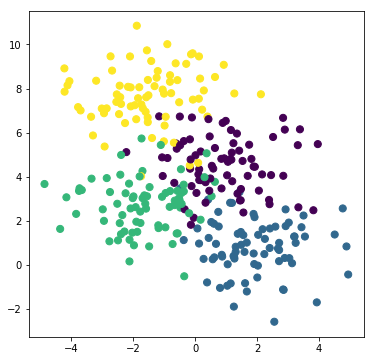

In [11]:
## we're going to do some plotting to see what we've got.
%matplotlib inline
from matplotlib import pyplot as plt

## import the cluster generation funciton
from sklearn.datasets.samples_generator import make_blobs

## the blobs are just centered groups of points
## the (2-d) points are the first output (a numpy array-matrix)
## and their labels are the second output array
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.25, random_state=0)

## let's plot the  blobs
fig = plt.figure(figsize = (6,6))
## did you know you can use c = point categories
## in the scatter function to have matplotlib
## automatically color points by membership?
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)

#### 8.1.2.3 Exploring the data
Now that we've got our data, let's just start by exploring where the _empirical_, i.e. (no necess. 'true') data centers are. In other words, let's compute and plot the cluster centers in our picture.

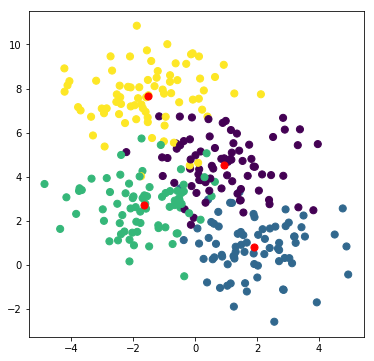

In [12]:
import numpy as np

## lists for the cluster centers
c_x = []
c_y = []

## loop over the possible labels
for label in set(y):
    ## slice out data rows by a boolean mask,
    ## checking to find the rows that match the current label
    ## store the x value
    c_x.append(np.mean(X[y==label, 0]))
    ## store the y value
    c_y.append(np.mean(X[y==label, 1]))

## initialize a picture
fig = plt.figure(figsize = (6,6))
## plot the data points
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)
## plot the cluster centers
_ = plt.scatter(c_x, c_y, s=50, color = "red")

#### 8.1.2.4 Understanding the algorithm's mechanics
What matters for the algorithm is: which points are closest to which centers?
Here, we'll investigate to see if all points would fall into their cluster's empirical center.
We'll plot the true labels next to the center-assigned labels to see what's changed.

In [13]:
## create an empty list of the closest-center-indices
## for each data point
y_closest_mean = []

## loop over  the rows of the data
for n in range(X.shape[0]):
    ## a crazy list comprehension to find the 
    ## distance-minimizing cluster center 
    ## for the current row of data
    y_closest_mean.append(
        min( ## use the min function
            [ ## make a list
                ( ## this will be a list of tuples
                    np.sqrt((X[n,:] - np.array(cxy))**2).sum(), ## compute the distance
                    m ## hold on to the cluster's index (it's label)
                ) 
                for m, cxy in enumerate(zip(c_x, c_y)) ## loop over the enumerated centers
            ]
        )[1] ## only take the cluster index from the minimizing tuple
    )

## convert our closest centers to a numpy array
y_closest_mean = np.array(y_closest_mean)

## print the labels to check our  work
print(y_closest_mean)

[2 3 0 3 0 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 2 1 0 2 2 3 3 0 3 3 3 3
 3 2 1 2 2 3 0 2 2 3 2 3 1 2 1 3 1 0 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 0 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 3 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 1 3 1 0 3 0 1 0 1 0 1 1 2 1 2 3 2 2 1 3 2 2 3 2 3 3 2 1 3 0 2 3 2
 3 3 3 0 0 0 1 2 3 2 1 0 3 0 0 0 0 2 1 0 1 0 0 3 1 0 3 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 2 2 0 0 2 2 2 1 2 3 0 0 1 2 0 2 2 3 0 0 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 2 0 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 0 0 2 1 0 2 2 0 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 1 1 1 1 0 3 3 1 1 1 1 1 1 3 0 3 0 1 1 3 3 3 1
 1 0 3 2]


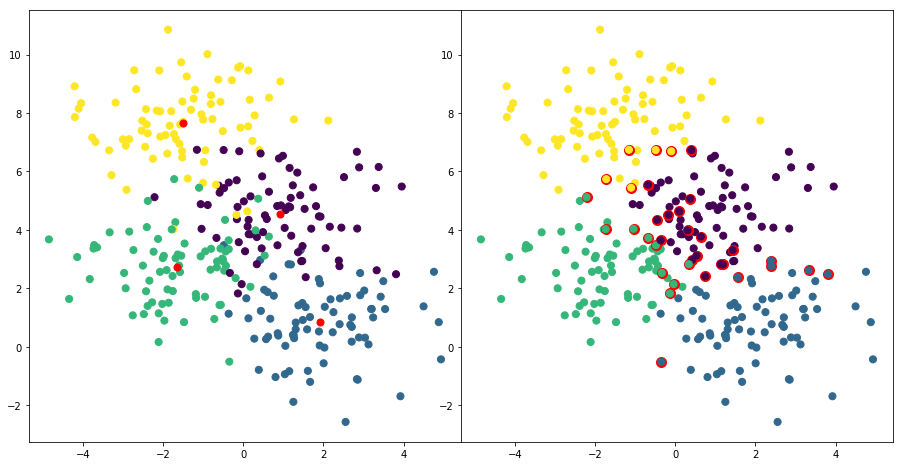

In [14]:
## initialize a wide figure
fig = plt.figure(figsize = (12,6))

## add the left axes
fig.add_axes([0,0,0.5,1])
## do scatter plots of the points and empirical centers
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)
_ = plt.scatter(c_x, c_y, s=50, color = "red")

## add the right axes
fig.add_axes([0.5,0,0.5,1])
## scatter plot the points if  their closest center is correct
_ = plt.scatter(
    X[y == y_closest_mean, 0], X[y == y_closest_mean, 1], 
    s=50, c = y[y == y_closest_mean]
)

## if their not correct, make a large, backing point that is red (highlighting)
_ = plt.scatter(
    X[y != y_closest_mean, 0], X[y != y_closest_mean, 1], 
    s=100, c = "red", alpha = 1
)

## plot color of incorrect points over the red background points
_ = plt.scatter(
    X[y != y_closest_mean, 0], X[y != y_closest_mean, 1], 
    s=50, c = y_closest_mean[y != y_closest_mean]
)

#### 8.1.2.5 Implementing K-means clustering

So, that would just be one iteration, and starting from the ideal center locations.
In general, the centers, $c_1,\cdots, c_k$ are placed randomly, and the algoiruthm is allowed to proceed several times, i.e. for several iterations. This can be easily done with an sklearn module:

- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

The algorithm has a few parameters of interest than can be tuned:

- `sklearn.cluster.KMeans(n_clusters=8, n_init=10, max_iter=300)`

Here, `n_clusters` is our $k$, and `max_iter` describes how many EM-cycles the algorithm should proceed for. The other parameter here: `n_init` refers to the number of random starts we allow the implementation to take. The final output from the `n_init` is determined by a best-clustering measure called _inertia_ that describes how tightly-packed the clusters are. Let's see how well it does with the default, `max_iter = 300` iterations.

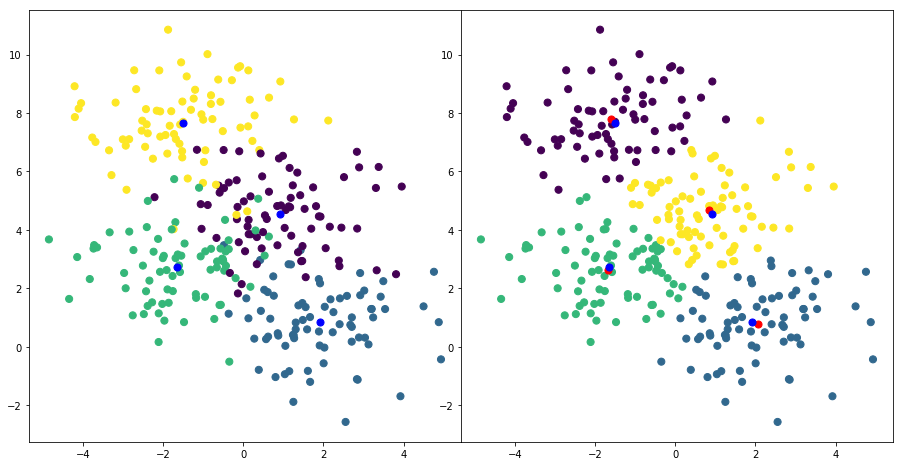

In [15]:
## get kmeans clustering from sklearn
from sklearn.cluster import KMeans

## initialize the algorithm
kmeans = KMeans(n_clusters=4)

## run the algorithm on the data
kmeans.fit(X)

## gather the predicted cluster labels
y_hat = kmeans.predict(X)

## make empty lists for the predicted cluster centers
model_c_x = []
model_c_y = []

## loop through the clusters and find their centers
for label in set(y_hat):
    model_c_x.append(np.mean(X[y_hat==label, 0]))
    model_c_y.append(np.mean(X[y_hat==label, 1]))
        
## initialize a wide figure
fig = plt.figure(figsize = (12,6))

## plot the original data and "true" centers
fig.add_axes([0,0,0.5,1])
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)
_ = plt.scatter(c_x, c_y, s=50, color = "blue")

## plot the modeled data and "predicted" centers
fig.add_axes([0.5,0,0.5,1])
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y_hat)
_ = plt.scatter(model_c_x, model_c_y, s=50, color = "red")
_ = plt.scatter(c_x, c_y, s=50, color = "blue")

#### 8.1.2.6 Interpretation
Some things to consider:
- Our model re-numbers the clusters! Even if our data are unlabeled, $k$-means comes up with a totally new labeling for the cluster centers/names.
- Not all data are easily clustered: here, clusters take spherical shapes.
- What if we don't know what $k$ is?
- How can this get better if we _do_ know true labels?

## 8.2 More classification and regression (supervised) learning algorithms
The abstraction proivded by `Pipeline()` lets us focus a bit more on exploring and comparing algorithms, as opposed to programming them. So, let's discuss a few of the more common ones and see how they fit into this pipelines framework.

Additionally, since it becomes so easy to implement the broad variety of algorithms that exist this is a good time to explore our mathematical understanding of algorithms. One that is often taught early in ML contexts is a probabilistic model for classification called _naïve Bayes_, which we explore next. 

### 8.2.1 The naïve Bayes algorithm
Moving back to our supervised ML SPAM detection scenario, let's assume we have some $TDM$ and spam labels $y$? Assume, the $TDM$ has word-columns, $w_1, \cdots, w_n$ and document rows: $d_1, \cdots, d_m$. 

The difference we'd like to move forward with now collapses this $TDM$ to just two rows: one for the words from all SPAM documents, and the other for the words from all non-SPAM documents. For this two-by-$n$ $TDM$, let's compute a _joint_ bag-of-words empirical probability model for each _word-label_ pair: $P(w,y)$. We'll continue to let $M$ be the total number of words appearing across all documents, and now the $TDM$'s row-frequencies sums as:

- a row's sum measures total words for a label/class (e.g., SPAM, $y = 1$): 
$$M_{y = 1} = \sum_{i = 1}^n f_{y = 1}(w_i)$$

#### 8.2.1.1 Training naïve Bayes
The above representation allows us to compute word-label likelihoods, read as &quot;the probability of observing a word from a document of label $y$:

$$P(w\mid y) = \frac{P(w, y)}{P(y)} = \frac{f_y(w)}{M_y}$$

In a sense, these conditional probabilities are a _trained algorithm_, becasue the labels have been used to form distinct probability representations for each class label, $y$.

#### 8.2.1.2 Applying naïve Bayes
The interesting works begins when we start asking about _other_ documents.
This is the supervised ML step in which we take a model that has been trained by a known gold standard labeling&mdash;the two likelihood probability functions&mdash;and apply it to documents for which we potentially have no information. Suppose we encounter a _test_ document, $d$, with word frequencies: $f(w_i)$; $i=1,\cdots n$. The Naïve Bayes algorithm seeks to find:

$$P(y\mid d),$$

that is, the probability that the class label is $y$, e.g., SPAM, given the document of interest, $d$. Well, by Bayes' rule, we know:

$$P(y\mid d) = \frac{P(d\mid y)P(y)}{P(d)}$$

The quantity of interest at left is referred to as the _posterior probability_, because it is the probability we observe _after_ including information from the data and our knowledge of the problem. 

For now, we'll sidestep what $P(y)$ and $P(d)$ are, and just focus on $P(d\mid y)$, which is called the _class likelihood_ of the document, $d$, given the class label $y$. We then model a document, $d$, in the likelihood function as by its collection of words:

$$P(d\mid y) = P(w_1, \cdots, w_{M_d}\mid y)$$

which brings us to the next, _naïve assumption_ that the words inside of $d$ appear _independently_. Recall that if $A$ and $B$ are independent events, then $P(A,B) = P(A)P(B)$. Thus, our word-independence assumption allows us to continue with:

$$P(d\mid y) = P(w_1, \cdots, w_{M_d}\mid y)=\prod_{k=1}^{M_d} P(w_k \mid y)$$

In terms of the word-document frequencies, $f_d(w)$, and the different words present in the training data, the way to write this would then ultimately be:

$$P(d\mid y) = \prod_{k=1}^{n} P(w_k \mid y)^{f_d(w_k)}$$

#### 8.2.1.3 Pior probabilities
So far, we've discussed the _likelihood_ function. So what about the &quot;prior&quot;?
While the likeihood function provides Naïve Bayes with information about the documents class in accordance to the training data, other probability in our target numerator, $P(y)$ asks a broader question:

> What's the probability, $P(y)$, that any document is of class $y$, i.e., SPAM or not?

This is a question that can also be addressed empirically, e.g., we could set $P(\ell=1)$ to be equal to the  proportion of training documents that were actually $\ell=1$, i.e., SPAM. However, the probability is more generally referred to as a &quot;prior&quot; because it references the Bayesian statistical convention when a distributional form is _assumed_, as a result of _prior knowledge_ about the problem. So, even if we labeled an even, 50:50 split of data for training, we might know more broadly that SPAM constitures only 10% of the world's email&mdash;a Bernoulli model, and set $P(y=1) = 0.1$, $P(y=0) = 0.9$.

#### 8.2.1.4 Solving the two-class problem (a special case)
So, now that we've got that numerator, what do we do about that pesky denominator? Well, nothing! Supposing we've computed each of $P(y=1)$, $P(y=0)$, $P(d\mid y = 1)$, and $P(d\mid y = 0)$, we can use simplify our lives by observing that both class posterior probabilities

$$P(y = 0\text{ or }1\mid d) = \frac{P(d\mid y = 0\text{ or }1)P(y = 0\text{ or }1)}{P(d)}$$

have the same denominator, $P(d)$. Moreover, $P(y\mid d)$ should be a probability distribution across all class labels. That is, 

$$1 = P(y = 0\mid d) + P(y = 1\mid d).$$

Thus, for each label $y$ we only need compute the product of its prior and likelihood:

$$P(d\mid y)P(y).$$

Once these are computed for all labels, $y$, they can be divided by their sum:

$$P(d\mid y = 0)P(y = 0) + P(d\mid y = 1)P(y = 1)$$

to form the final, posterior probabilites, $P(y\mid d)$.

#### 8.2.1.5 Classifying documents
So what, we've got $P(y\mid d)$?
Well, for each document $d$, the probabilites, $P(y\mid d)$, describe the chance that our document is due the labels of interest. How do we select the right label? Well, a first approach might be to pick the label that maximizes probability:

$$y_d = \underset{y}{\text{argmax}}\{P(y\mid d)\}$$

which for our binary case just picks the label with $P(y\mid d)\geq 0.5$. More generally, we might set a _threshold_, $t$, where we only label the document $d$ postively, i.e., as SPAM, if $P(y\mid d) \geq t$. That's about it for basic Naïve Bayes. To play with a real example, let's review some data.

#### 8.2.1.6 Applying Naïve Bayes with SKLearn
Just like with the $k$-means clustering algorithm, or logistic regression, all of the hard work that _we_ have to do becomes focused on understanding how these algorithms work. For a standard implementation of naïve Bayes, we can just load the algorithm from `sklearn` easily. There's an extra _hyper-parameter_ called `alpha` that we'll preset to `0.1`, but otherwise not think about now. Other than that, running the algorithm should be procedurally familiar by now:

In [16]:
from sklearn.naive_bayes import MultinomialNB

NB_SPAM = Pipeline([('vect', CountVectorizer(input = 'filename')),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB(alpha = 0.1))])

NB_SPAM.fit(x_train, y_train)

predictions = NB_SPAM.predict(x_test)

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

Precision, recall, and F1 were:
0.8809523809523809
0.8457142857142858
0.8629737609329446



### 8.2.2 $k$-nearest Neighbors
$k$-nearest neighbors (KNN) is one of the simplest machine learning algorithms out there and probably classifies as having the "good-idea" motivation. It can be used either for classification (categorical prediction) or for regression (continuous prediction), so we'll explore it for both. In either case, the algorithm starts with a spreadsheet-matrix, $X$, of data record-rows; $\overline{x}_1,\cdots, \overline{x}_m$; each having $n$ column-features: $\overline{x}_i = [x_{i,1},\cdots, x_{i,n}]$ that get used to predict some target: $y_1, \cdots, y_m$.

Regardless of KNN being a classification or regression algorithm, it relies on one particular definition. Specifically, we difine $\mathcal{N}_k(\overline{x}_i)$ to be the _neighborhood_ of data nearest to $i^\text{th}$ row. Distance for neighborhoods is determined by a distance metric! Which would you choose? Euclidean?

#### 8.2.2.1 $k$-nearest neighbors classification

If our target data is categorical, e.g., $y_i = 0\:\text{ or}\: 1$, then our $k$-nearest neighbors algorithm is all about classification. For a test data point, $\overline{x}$, the KNN classifier will assign the class, $\hat{y}$, that is most common in $\mathcal{N}_k(\overline{x})$. For an intuition, the picture is:

![KNN](./images/KnnClassification.png)

Here's an example KNN `Pipeline()`:

In [17]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SPAM = Pipeline([('vect', CountVectorizer(input = 'filename')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier(10))])

KNN_SPAM.fit(x_train, y_train)

predictions = KNN_SPAM.predict(x_test)

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

Precision, recall, and F1 were:
0.9226190476190477
0.6828193832599119
0.7848101265822786



#### 8.2.2.2 Exercise: Hyperparameter tuning
Explore several different values $k$ for the number of nearest neighbors to see if you can build a better model!

In [18]:
## code here

#### 8.2.2.3 $k$-nearest neighbors regression
As it turns out, we can use KNN for regression, too, so let's load some regression data (baseball players) and see what this can do:

In [19]:
import pandas as pd
baseball_data = pd.read_csv('./data/2008_merged_baseball_data.csv')

yreg = baseball_data[['weight']]

xreg = baseball_data[[u'G', u'AB', u'R', u'H', u'2B', 'salary',
                      u'3B', u'HR', u'RBI', u'SO', u'HBP', u'G_F', u'PO', u'A', u'E',
                      u'height', u'G_P', u'W', u'L',
                      u'SO_P', u'ER', u'HR_P', u'H_P', u'HBP_P']].as_matrix()

xreg_train, xreg_test, yreg_train, yreg_test = train_test_split(xreg, yreg, test_size=0.33, random_state=42)

/Users/jw3477/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


Now that we've got data we can talk about KNN. Instead of classifying into a category by each point's nearest neighbors, KNN regression estimates (regresses) values as the _averages_ of each point's nearest neighbors. Specifically, for a test data point, $\overline{x}$, the KNN regression will find an average value $\hat{y}$, computed across $\{y_i\mid\overline{x}_i\in \mathcal{N}_k(\overline{x})$\}. Once again, this is a straightforward pipeline application in sklearn, where we can stage transformations, like PCA:

In [20]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

KNN_regressor = Pipeline([('pca', PCA(n_components = 5)),
                          ('reg', KNeighborsRegressor(10))])

KNN_regressor.fit(xreg_train, yreg_train)

# predict on a separate testing set
predictions = KNN_regressor.predict(xreg_test)

# compute the SSE
SSE = ((np.array(yreg_test) - predictions)**2).sum()

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print(RMSE)

18.444575186248382


### 8.2.3 Decision Trees and Random Forests
Another common family of models that supports both classification and regression are _decision trees_, and their cousins, _random forests_. Let's start with the former, particularly in the context of classification.

#### 8.2.3.1 Decision tree classification
We can think of a decision tree as a one-directional flow chart in which each branching point entails the assessment of a question:

![Decision Tree](./images/Titanic_Survival_Decison_Tree.png)

The terminal branches are referred to as leaves, and represent the ultimate decisions made by the model. The tricky part is figuring out which questions need to be asked and in what order. This is once again the subject of optimization. However, because decision trees are not smooth, like with SSE and likelihood in linear and logistic regression (respectively), most decision tree optimizers are based on making the trees store information efficiently, optimizing entropy.

Anyway, the nice parts are that no data normalization or transofrmation are required, and that one can trace each decision back to a specific variable. Let's once again use sklearn to try this out on our Opinion SPAM dataset:

In [21]:
from sklearn.tree import DecisionTreeClassifier

DT_SPAM = Pipeline([('vect', CountVectorizer(input = 'filename')),
                    ('tfidf', TfidfTransformer()),
                    ('clf', DecisionTreeClassifier())])

DT_SPAM.fit(x_train, y_train)

predictions = DT_SPAM.predict(x_test)

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

Precision, recall, and F1 were:
0.6785714285714286
0.6785714285714286
0.6785714285714286



#### 8.2.3.2 Decision tree regression
With decision tree regression, the goal is to predict a value at each leaf, instead of a class. While there are even more variations in how  this can be accomplished, it's as easy as pie in sklearn:

In [22]:
from sklearn.tree import DecisionTreeRegressor

DT_regressor = Pipeline([('pca', PCA(n_components = 5)),
                         ('reg', DecisionTreeRegressor())])

DT_regressor.fit(xreg_train, yreg_train)

# predict on a separate testing set
predictions = DT_regressor.predict(xreg_test)

# compute the SSE
SSE = ((np.array(yreg_test).transpose() - predictions)**2).sum()

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print(RMSE)

21.573653251591


### 8.2.4 Random forests (overfitting and ensembles)
Where one tree overfits, a _random forest_ of trees can smear these effects out to produce better results. A decision tree will learn hyper-specific rules tailored to a particular batch of training data. This is precisely the issue of _overfitting_. An important method used to overcome this issue is called _bootstrapping_. With bootstrapping, a dataset is sampled repeatedly during training. So for a random forest, we'll bootstrap samples (with replacement) from our training set and build different versions of a decision tree model. The collection of bootstrapped models then have their output merged.

#### 8.2.4.1 Random forest classification
A random forest classifier takes the concensus of bootstrapped trees. So, much like our KNN classifier assigned a class according to the most common neighbor labels, a random forest classifer will assign the class that is most commonly predicted by a collection of bootstrapped trees. The number of bootstrapped trees is a parameter to be decided upon by the user! For us, a basic implementation is once again quite easy:

In [23]:
from sklearn.ensemble import RandomForestClassifier

RF_SPAM = Pipeline([('vect', CountVectorizer(input = 'filename')),
                    ('tfidf', TfidfTransformer()),
                    ('clf', RandomForestClassifier())])

RF_SPAM.fit(x_train, y_train)

predictions = RF_SPAM.predict(x_test)

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

Precision, recall, and F1 were:
0.6726190476190477
0.7902097902097902
0.7266881028938907



/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### 8.2.4.2 Random forest regression
For a random forest regressor, the concept is very much the same as with KNN regression. The algorithm operates much like the KNN regression, now averaging the predictions made by the bootstrapped decision trees. 

In [24]:
from sklearn.ensemble import RandomForestRegressor

RF_regressor = Pipeline([('pca', PCA(n_components = 5)),
                         ('reg', RandomForestRegressor())])

RF_regressor.fit(xreg_train, yreg_train)

# predict on a separate testing set
predictions = RF_regressor.predict(xreg_test)

# compute the SSE
SSE = ((np.array(yreg_test).transpose() - predictions)**2).sum()

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print(RMSE)

16.85907976433841


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


### 8.2.5 Support Vector Machines
SVMs, as they're called, are all about separation. Instead of linear regression that is focused on fitting a line to a cloud of points, the goal of an SVM is to separate clouds of points from one another. The simplest kind of SVM also uses a line, but for the separation of classes:

![Support Vector Machine](./images/Svm_max_sep_hyperplane.png)

Thus, for a linear SVM a trained classifier consists of a set of slope and intercept parameters, $\overline{w}$ and $b$, while define a line (hyperplane) that is as far as possible from each of the training classes. 

Optimization of these SVMs requires maximizing the separation distance. When this objective function is expressed, it is maximized once again by gradient descent. So, just like logistic and multilinear regression, we won't worry optimization for SVMs. However, as an aside it's worth noting that there is a deep, interesting connection between linear SVMs and logistic regression, which also uses a linearization for classification. This actually makes logistic regression a bit more general than a linear SVMs, but SVM's have their own rich study that differs from logistic regression when you start considering classification surfaces that are non linear. We'll only talk about SVMs shallowly, thinking about them as a classification algorithm. So. here's the gist in sklearn:

In [25]:
from sklearn.svm import LinearSVC

SVM_SPAM = Pipeline([('vect', CountVectorizer(input = 'filename')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC())])

SVM_SPAM.fit(x_train, y_train)

predictions = SVM_SPAM.predict(x_test)

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

Precision, recall, and F1 were:
0.8571428571428571
0.8780487804878049
0.8674698795180722



## 8.3 Making comparisons
As a general procedure, the game plan with regression or classification problem that explore a number of algorihtm balances two objectives:

1. get the best possible evaluation
2. maintain the best possible transparency.

with perhaps some consideration for run time. So, while thinking if an algorithm is a good, intuitive fit, it also customary to place all next to one other, in comparison according to a chose evaluation metric. For example, we could compare the RMSE for each of our salary-prediction algorithms. We might take the output from below and compile it all in a table, or if we're savay like the sklearn people, make a comparison figure:

- http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

provided we're lucky enough to only have two deatures to consider. Let's compare all of our classifier pipelines according to precision, recall, and $F_1$:

In [26]:
classifiers = [("Naïve Bayes", NB_SPAM),
               ("SVM", SVM_SPAM), 
               ("Random Forest", RF_SPAM), 
               ("Decision Tree", DT_SPAM), 
               ("Logistic Regression", logistic_SPAM)]

for name, classifier in classifiers:
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)

    print("For "+ name +", precision, recall, and F1 were:")
    print(precision_score(predictions, y_test))
    print(recall_score(predictions, y_test))
    print(f1_score(predictions, y_test))  
    print("")

For Naïve Bayes, precision, recall, and F1 were:
0.8809523809523809
0.8457142857142858
0.8629737609329446

For SVM, precision, recall, and F1 were:
0.8571428571428571
0.8780487804878049
0.8674698795180722

For Random Forest, precision, recall, and F1 were:
0.6607142857142857
0.8409090909090909
0.74

For Decision Tree, precision, recall, and F1 were:
0.6607142857142857
0.6529411764705882
0.6568047337278107

For Logistic Regression, precision, recall, and F1 were:
0.8630952380952381
0.8950617283950617
0.8787878787878788

